---

##  The Grover Algorithm: Exercises

_course: quantum cryptography for beginners
<br>date: 12 november 2024
<br>author: burton rosenberg_

---


In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, Pauli 
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from IPython.display import display, Math, HTML
import time, math
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

print(f'\nqiskit version: {qiskit.version.get_version_info()}\n')

import math
import numpy as np
import matplotlib.pyplot as plt


qiskit version: 1.1.2



#### Exercise A

In the expostion at circuit $R_{h_0}$ was given that reflects over the space perpendicular to $h_0=H^{\otimes n}|0\rangle$. We are to experiment with this circuit show show it correct. 

Given
$$
R_{h_0} = I -2\,|h_0\rangle\langle h_0|
$$ 
what should be the result of $R_{h_0}\,h_i$?

Predict and experimentally verify.

Answer: $$R_{h_0}\,h_i= (-1)^{i==0}h_i$$

Hints:
- [Statevector.equiv](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Statevector#equiv)
- [Statevector.inner](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Statevector#inner)

In [2]:
### Exercise A



#### Exercise B

With the notation as above, what should $R_{h_0} = |j\rangle$ be?

Calculate theoretical and test in the circuit

In [3]:
### Exercise B


#### Exercise C

Continue the construction for general $n$.


In [4]:
#### Exercise C


#### Exercise D

This construction has depth $n$. Consider a circuit for which the depth is $O(\log n)$.

In [5]:
#### Exercise D



----

### Answers 

----

#### Exercise A

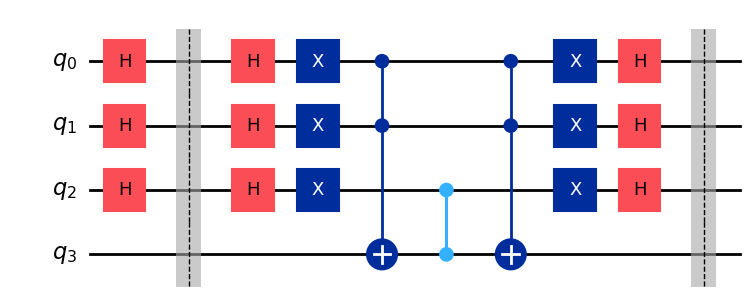

<IPython.core.display.Math object>

's in'

<IPython.core.display.Latex object>

's out'

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

's in'

<IPython.core.display.Latex object>

's out'

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

's in'

<IPython.core.display.Latex object>

's out'

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

's in'

<IPython.core.display.Latex object>

's out'

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

's in'

<IPython.core.display.Latex object>

's out'

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

's in'

<IPython.core.display.Latex object>

's out'

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

's in'

<IPython.core.display.Latex object>

's out'

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

's in'

<IPython.core.display.Latex object>

's out'

<IPython.core.display.Latex object>

In [18]:

# I - 2 |phi_0><phi_0|

# any output of the H except all one's should be fixed. 
# the all one's should invert (-1)
# and simple spikes should be -1/4 for all but 3/4 for the spike


def hadamard_basis(qc,n,i):
    for j in range(n):
        if i%2==1:
            qc.x(j)
        i = i//2
    for j in range(n):
        qc.h(j)
    qc.barrier()
    return Statevector(qc), qc
    

def Ur_3(qc):
    for i in range(3):
        qc.h(i)
        qc.x(i)
    qc.ccx(0,1,3)
    qc.cz(3,2)
    qc.ccx(0,1,3)
    for i in range(3):
        qc.x(i)
        qc.h(i)
    qc.barrier()
    return Statevector(qc), qc

def test_hadamard_basis(n, show_one=-1):
    
    for i in range(2**n):
        qc = QuantumCircuit(n+1)
        sv_in, qc = hadamard_basis(qc,n,i)
        sv_out, qc = Ur_3(qc)
        if show_one==i or show_one<0:
            display(qc.draw('mpl'))
        display(HTML(f'<hr>'))
        display(Math(f'<h_{i}|R h_{i}> = {sv_in.inner(sv_out):.2f}'))
        display('s in', sv_in.draw('latex'),'s out',  sv_out.draw('latex'))
        assert sv_in.equiv(sv_out), f'Assertion failed for i={i}'
        

n = 3    

test_hadamard_basis(n, show_one=0)   


#### Exercise B

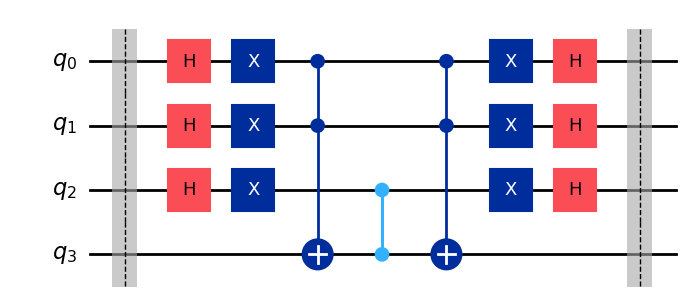

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:

def unit_basis(qc,n,i):
    for j in range(n):
        if i%2==1:
            qc.x(j)
        i = i//2
    qc.barrier()
    return Statevector(qc), qc


def test_unit_basis(n, show_one=-1):
    
    for i in range(2**n):
        qc = QuantumCircuit(n+1)
        sv_in, qc = unit_basis(qc,n,i)
        sv_out, qc = Ur_3(qc)
        if show_one==i or show_one<0:
            display(qc.draw('mpl'))
        display(HTML(f'<hr>'))
        display(Math(f'<h_{i}|R h_{i}> = {sv_in.inner(sv_out):.2f}'))
        display(sv_in.draw('latex'), sv_out.draw('latex'))
        # assert sv_in.equiv(sv_out), f'Assertion failed for i={i}'
        

n = 3    
test_unit_basis(n, show_one=0)   

    

#### Exercise C

#### Exercise D
